# Contruyendo Modelos de Machine Learning desde cero...

## El proceso:
1. Coleccion de datos
2. Preparacion de datos
3. Eleccion del modelo: https://scikit-learn.org/stable/supervised_learning.html
4. Entrenamiento: Split (Train|Test|Validaton), regla: 80:20 o 70:30 o 60:40
5. Evaluacion: Metricas: https://scikit-learn.org/stable/api/sklearn.metrics.html
6. Hyperparameter tunning.
7. Hacer predicciones...

## 1. Coleccion de datos.
Vamos a usar el conjunto de datos de calidades de vino desde:https://archive.ics.uci.edu/dataset/186/wine+quality
. La idea es lograr un modelo de machine learning que pueda predecir la calidad de los vinos en base a varias variables fisico-quimicas de la composicion del mismo.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Cargando datos...
df = pd.read_csv("winequality-red.csv", delimiter=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [3]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
df.isnull().sum()/len(df)*100

fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
# Determinando significancias de las variables
for i in df.columns:
    xbar=df[i].mean()
    sigma=df[i].std()
    p=np.round(sigma/xbar, 3)
    
    print("La significancia de {} es igual a {}".format(i,p))

La significancia de fixed acidity es igual a 0.209
La significancia de volatile acidity es igual a 0.339
La significancia de citric acid es igual a 0.719
La significancia de residual sugar es igual a 0.555
La significancia de chlorides es igual a 0.538
La significancia de free sulfur dioxide es igual a 0.659
La significancia de total sulfur dioxide es igual a 0.708
La significancia de density es igual a 0.002
La significancia de pH es igual a 0.047
La significancia de sulphates es igual a 0.258
La significancia de alcohol es igual a 0.102
La significancia de quality es igual a 0.143


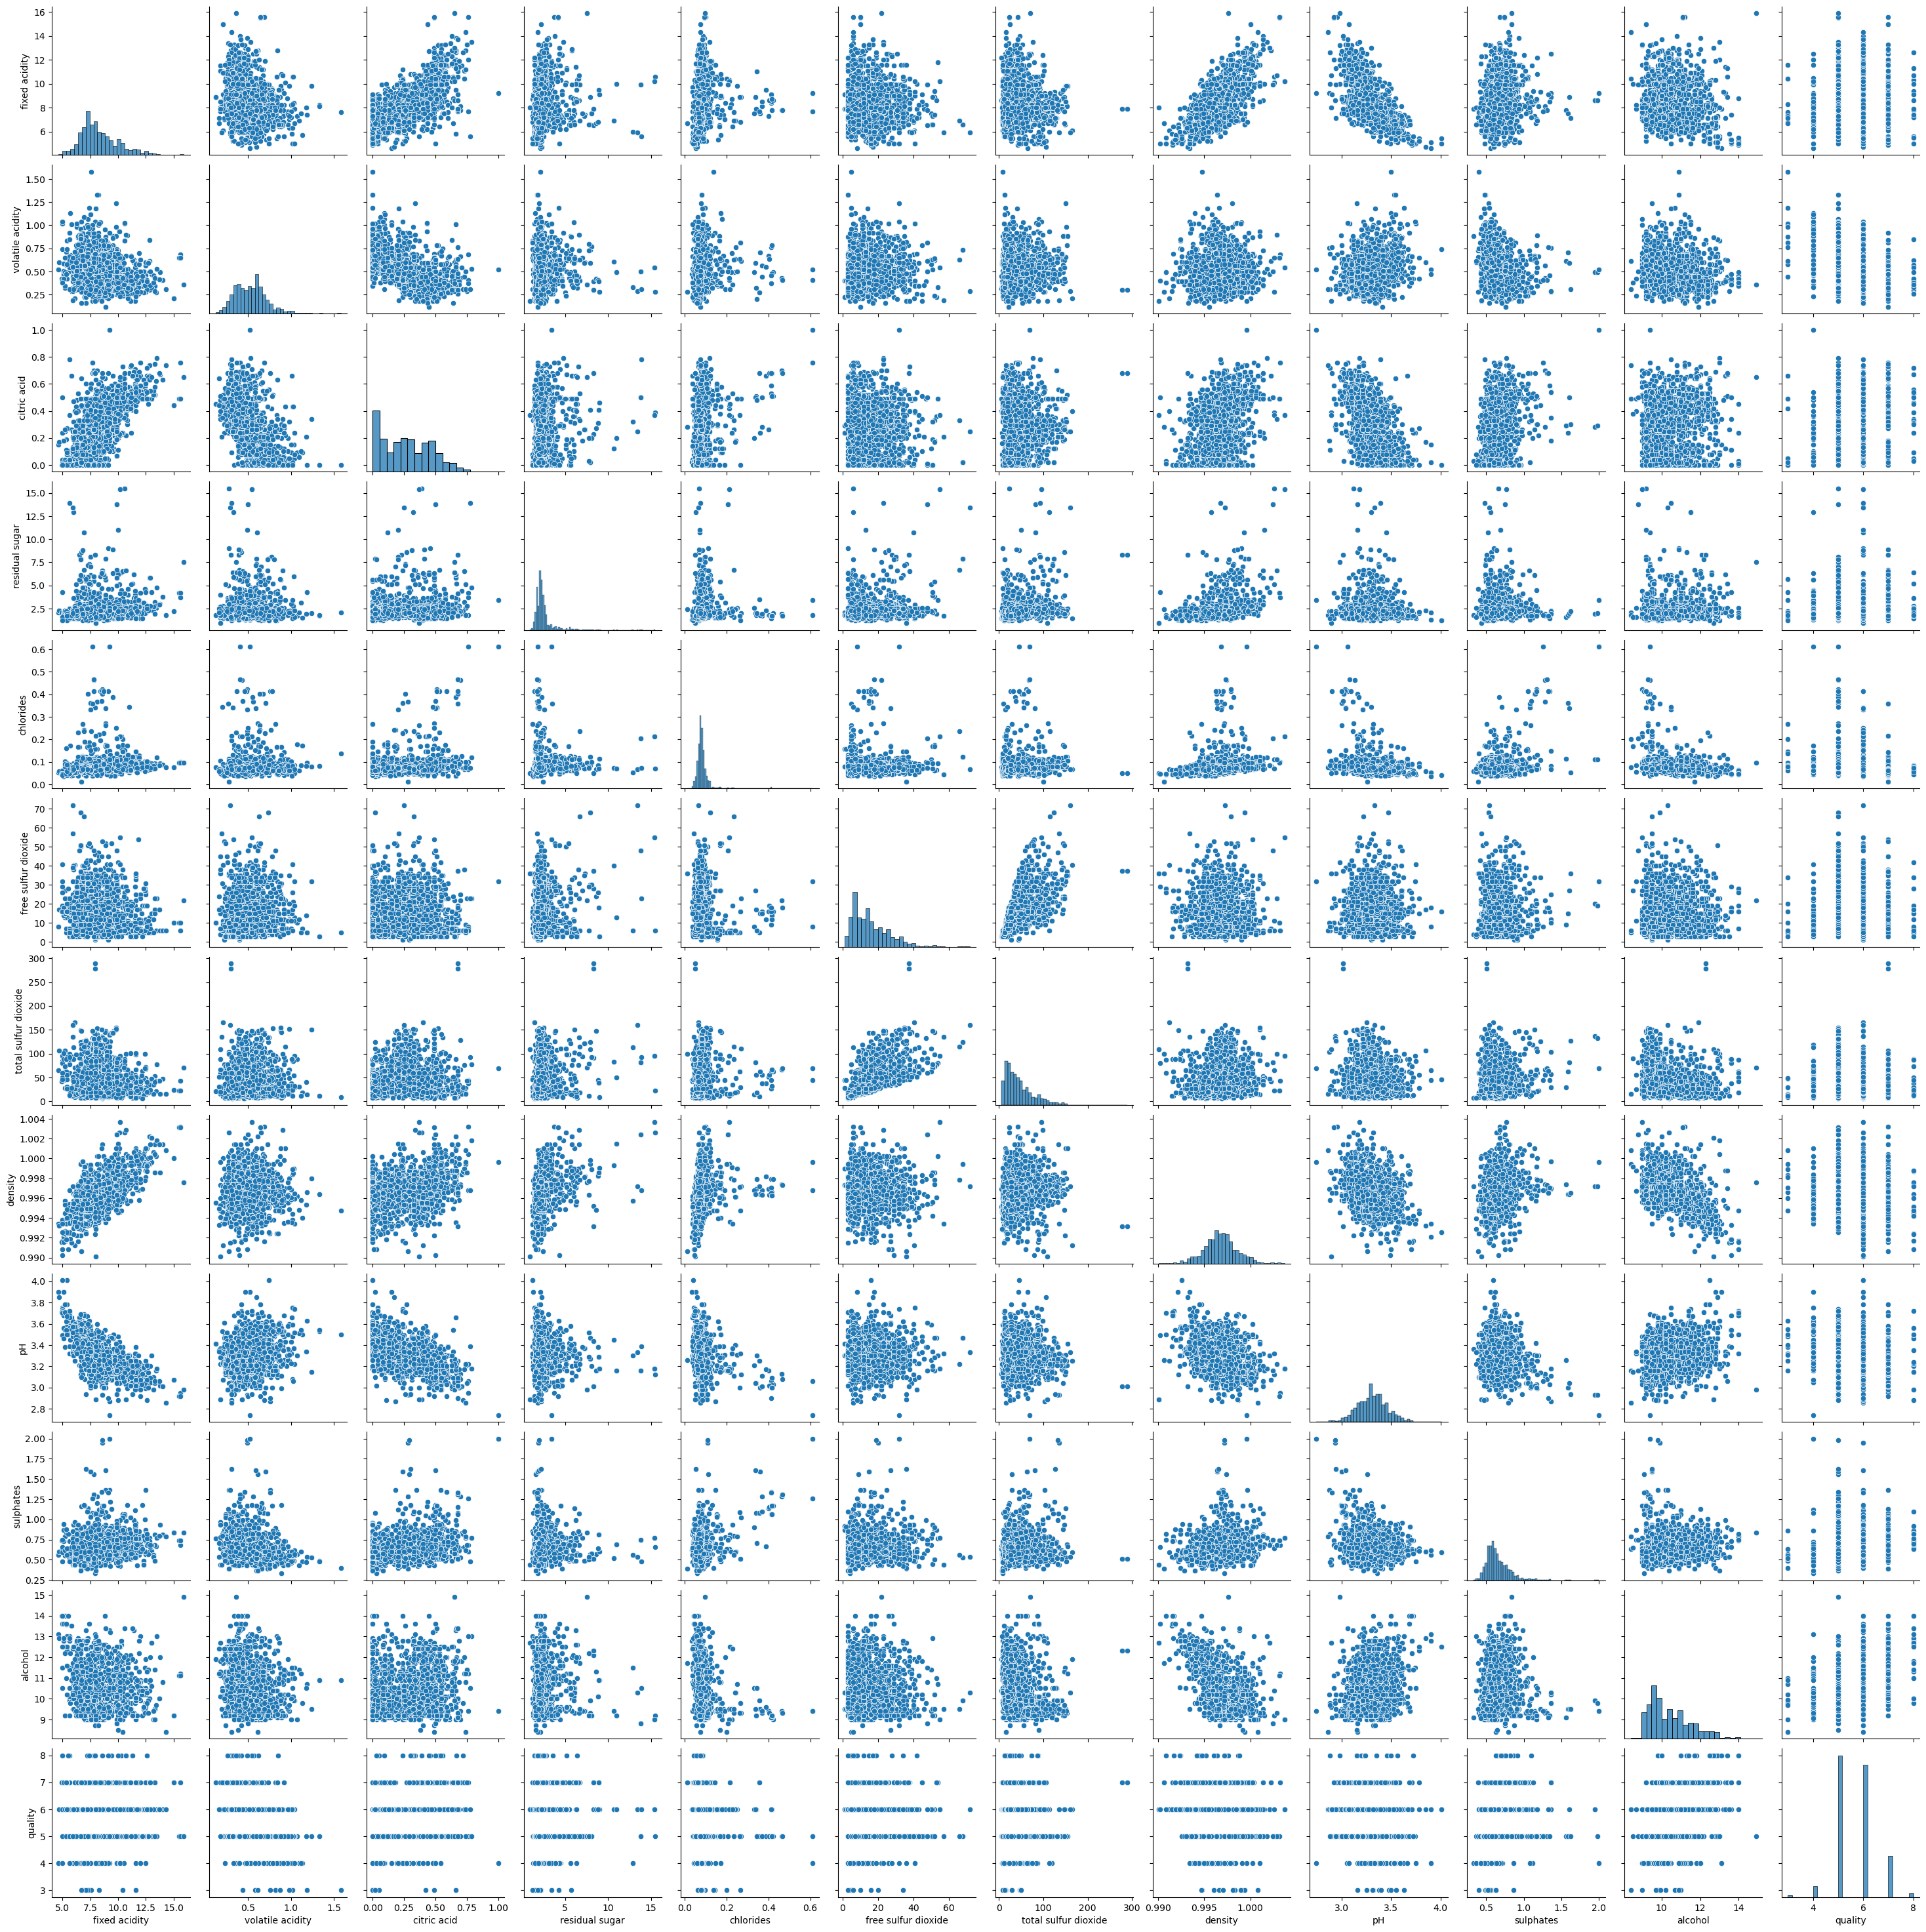

In [7]:
import seaborn as sns
sns.pairplot(df)

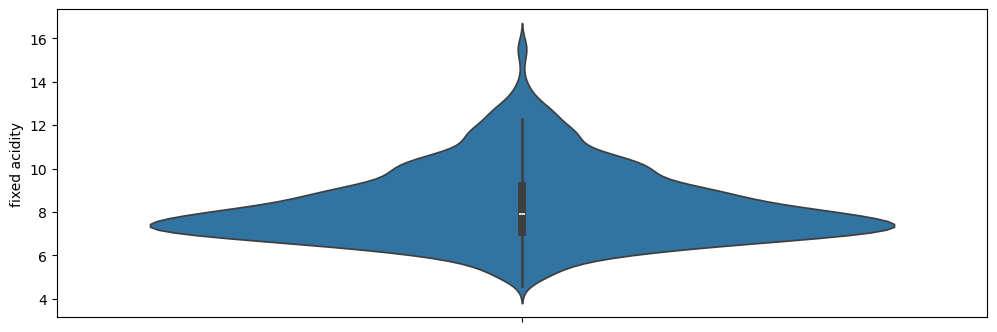

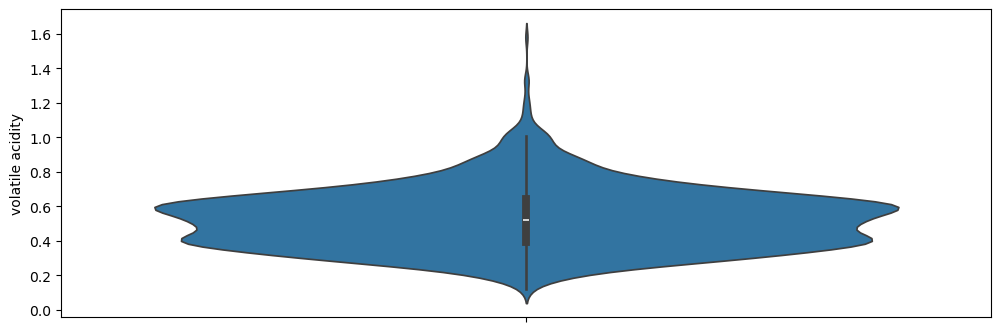

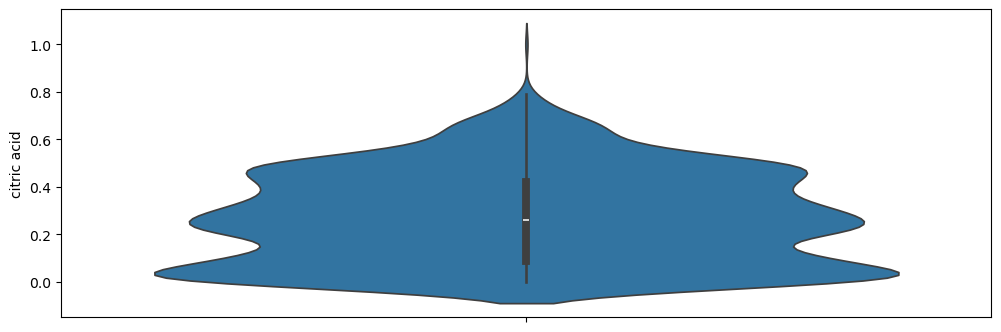

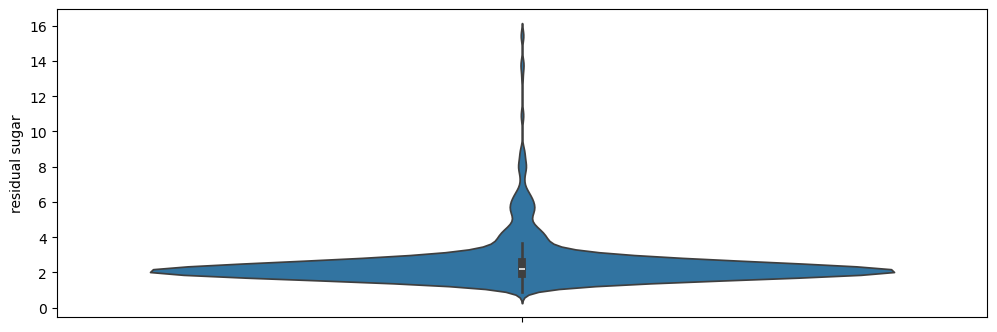

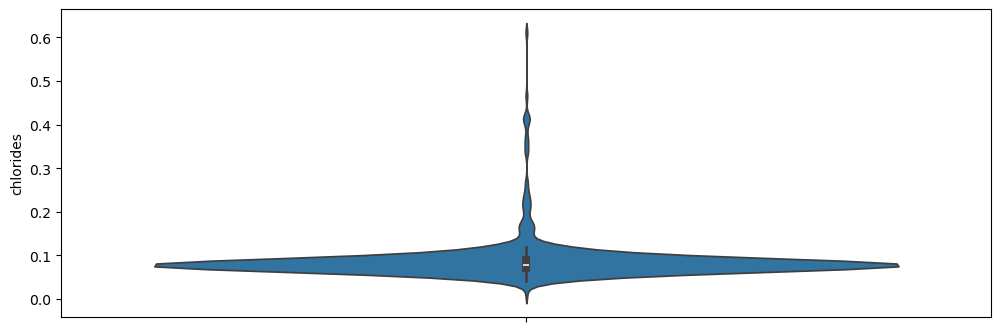

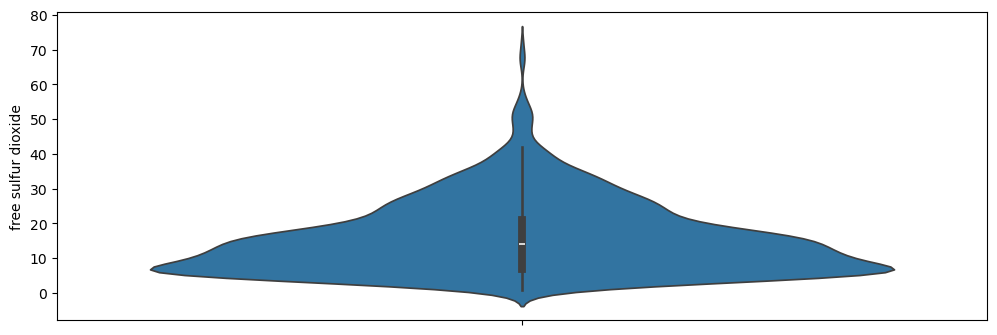

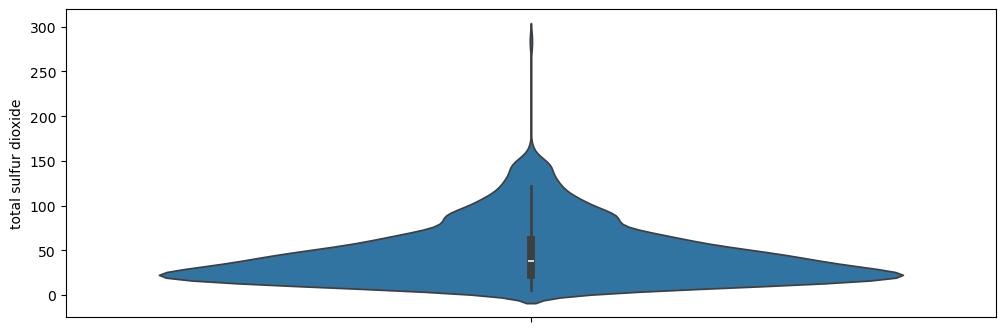

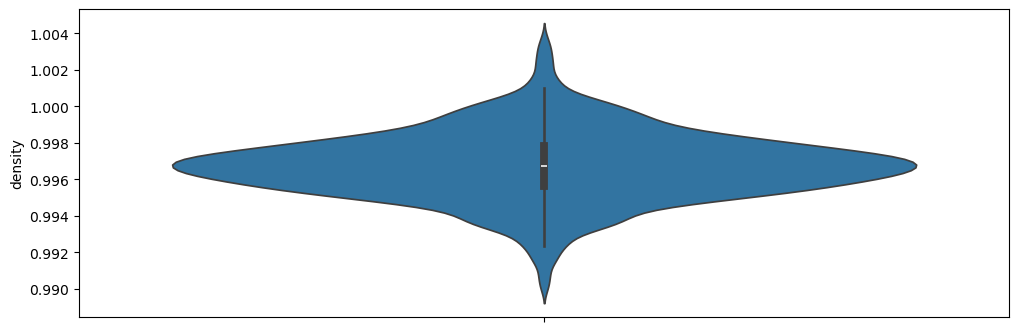

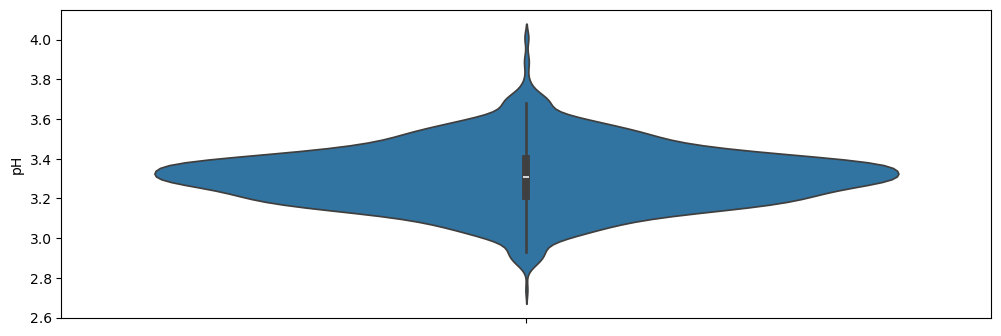

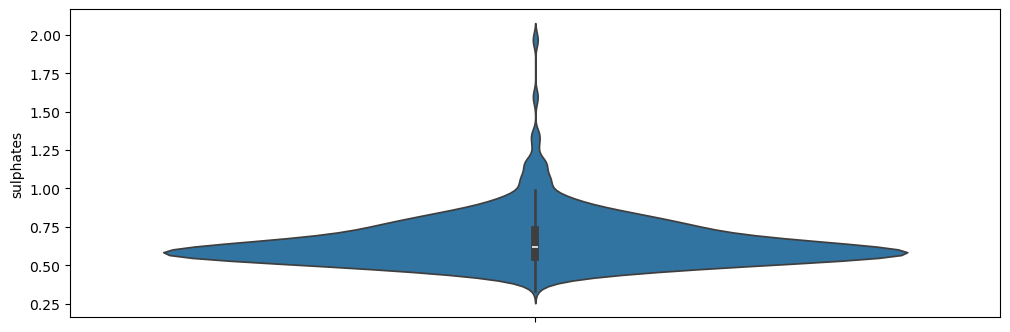

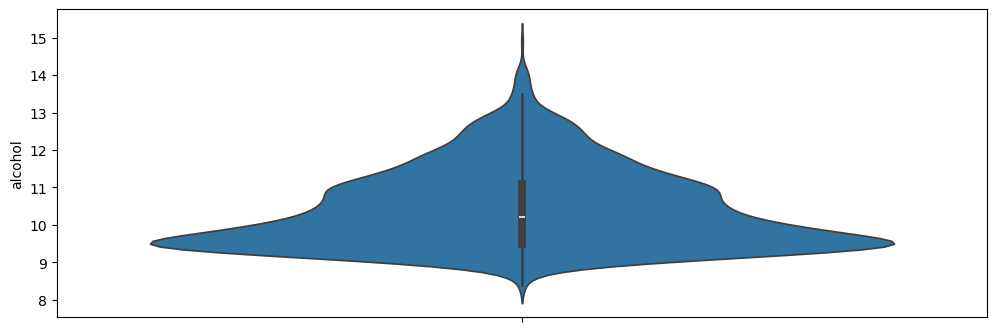

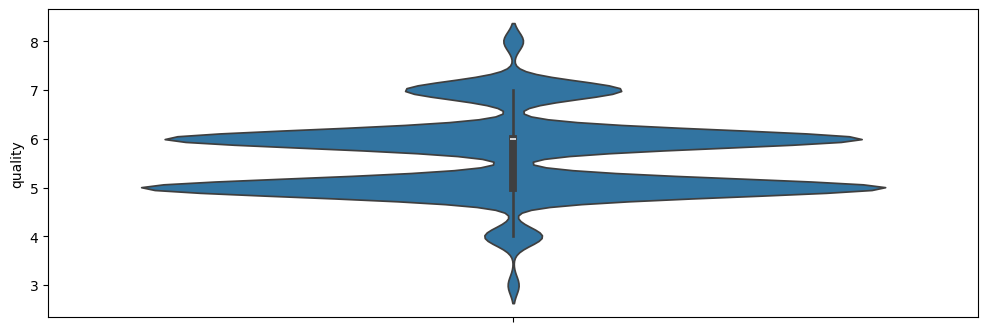

In [8]:
for i in df.columns:
    plt.figure(figsize=(12,4))
    sns.violinplot(df[i])
    plt.xticks(rotation=30,ha="right")
    plt.show()

In [9]:
# Determinando valores sospechosos de ser outliers en cada una de las variables...
Ndisp=3
for i in df.columns:
    median=df[i].median()
    q1=np.percentile(df[i],25)
    q3=np.percentile(df[i],75)
    r1,r3=median-Ndisp*q1,median+Ndisp*q3
    print("Variables: {}".format(i),np.unique(np.array(df[(df[i]<r1)|(df[i]>r3)][i])))

Variables: fixed acidity []
Variables: volatile acidity []
Variables: citric acid []
Variables: residual sugar [10.7 11.  12.9 13.4 13.8 13.9 15.4 15.5]
Variables: chlorides [0.358 0.36  0.368 0.369 0.387 0.401 0.403 0.413 0.414 0.415 0.422 0.464
 0.467 0.61  0.611]
Variables: free sulfur dioxide []
Variables: total sulfur dioxide [278. 289.]
Variables: density []
Variables: pH []
Variables: sulphates []
Variables: alcohol []
Variables: quality []


## **3. Selección del modelo...**

- Los modelos mas importantes están en : https://scikit-learn.org/stable/supervised_learning.html.
- Supongamos que es regresion:
- **Regresion lineal**: https://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares
- **Dummy regressor**: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html
- **Decision Trees**: https://scikit-learn.org/stable/modules/tree.html
- **Random Forest**: https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

- Supongamos que es clasificacion:
- **Decision Trees**: https://scikit-learn.org/stable/modules/tree.html#classification
- **Random Forest**: https://scikit-learn.org/stable/modules/ensemble.html#random-forests-and-other-randomized-tree-ensembles

In [10]:
from sklearn import linear_model # Regresion lineal
from sklearn.dummy import DummyRegressor # Dummy regressor
from sklearn import tree ##Decision Trees
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingRegressor, HistGradientBoostingClassifier

## **4. Entrenamiento de los modelos...**
- Usaremos una particion 70:30, es decir, entrenaremos con 70% (1119 datos) de los datos y evaluaremos con el restante 30% (480 datos) de los datos.
- Dos opciones: **train|test|val** o solo train|test
- Tenemos dos opciones al menos:
    - Tomamos los primeros 1119 datos para entrenamiento y el resto para probar, en este caso:
        - train=df[0:1119]. y test=df[1119:].
    - Lo hacemos aleatorio: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [12]:
from sklearn.model_selection import train_test_split
X=df[["fixed acidity",	"volatile acidity",	"citric acid",	
"residual sugar",	"chlorides",	"free sulfur dioxide",	
"total sulfur dioxide",	"density",	"pH",	"sulphates",	
"alcohol"]]
y=df["quality"]
# X = df.drop(columns=["quality"])
# y = df["quality"]

X_train, X_tmp, y_train, y_tmp = train_test_split(
    X, y, test_size=0.30, random_state=42)

X_test, X_val, y_test, y_val = train_test_split(
    X_tmp, y_tmp, test_size=0.50, random_state=42)

In [13]:
X_train.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
925,8.6,0.22,0.36,1.9,0.064,53.0,77.0,0.99604,3.47,0.87,11.0
363,12.5,0.46,0.63,2.0,0.071,6.0,15.0,0.99880,2.99,0.87,10.2


In [14]:
X_test.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
629,7.6,0.685,0.23,2.3,0.111,20.0,84.0,0.9964,3.21,0.61,9.3
100,8.3,0.610,0.30,2.1,0.084,11.0,50.0,0.9972,3.40,0.61,10.2


In [15]:
for i,j,k in zip([X_train, X_test, X_val, y_train, y_test, y_val],
                 ["Train", "Test", "validation", "Train", "Test", "validation"],
                 ["Features", "Features", "Features", "Target", "Target", "Target"]):
  print("Para el conjunto {} en {} tenemos {} datos".format(j,k, len(i)))

Para el conjunto Train en Features tenemos 1119 datos
Para el conjunto Test en Features tenemos 240 datos
Para el conjunto validation en Features tenemos 240 datos
Para el conjunto Train en Target tenemos 1119 datos
Para el conjunto Test en Target tenemos 240 datos
Para el conjunto validation en Target tenemos 240 datos


## **Calcular Modelos**

Entrenar....

### Regresion:

In [16]:
from ipywidgets.widgets.trait_types import dt
dummy_reg = DummyRegressor()
linear_reg = linear_model.LinearRegression()
dt_reg = tree.DecisionTreeRegressor()
rf_reg = RandomForestRegressor(n_estimators=300, n_jobs=-1)
hgb_reg = HistGradientBoostingRegressor(loss='squared_error')

In [17]:
hgb_reg

,"loss loss: {'squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'}, default='squared_error'The loss function to use in the boosting process. Note that the""squared error"", ""gamma"" and ""poisson"" losses actually implement""half least squares loss"", ""half gamma deviance"" and ""half poissondeviance"" to simplify the computation of the gradient. Furthermore,""gamma"" and ""poisson"" losses internally use a log-link, ""gamma""requires ``y > 0`` and ""poisson"" requires ``y >= 0``.""quantile"" uses the pinball loss... versionchanged:: 0.23 Added option 'poisson'... versionchanged:: 1.1 Added option 'quantile'... versionchanged:: 1.3 Added option 'gamma'.",'squared_error'
,"quantile quantile: float, default=NoneIf loss is ""quantile"", this parameter specifies which quantile to be estimatedand must be between 0 and 1.",None
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",None
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide ` and:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_categorical.py`... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 

In [18]:
dummy_reg.fit(X_train, y_train)
linear_reg.fit(X_train, y_train)
dt_reg.fit(X_train, y_train)
rf_reg.fit(X_train, y_train)
hgb_reg.fit(X_train, y_train)

,"loss loss: {'squared_error', 'absolute_error', 'gamma', 'poisson', 'quantile'}, default='squared_error'The loss function to use in the boosting process. Note that the""squared error"", ""gamma"" and ""poisson"" losses actually implement""half least squares loss"", ""half gamma deviance"" and ""half poissondeviance"" to simplify the computation of the gradient. Furthermore,""gamma"" and ""poisson"" losses internally use a log-link, ""gamma""requires ``y > 0`` and ""poisson"" requires ``y >= 0``.""quantile"" uses the pinball loss... versionchanged:: 0.23 Added option 'poisson'... versionchanged:: 1.1 Added option 'quantile'... versionchanged:: 1.3 Added option 'gamma'.",'squared_error'
,"quantile quantile: float, default=NoneIf loss is ""quantile"", this parameter specifies which quantile to be estimatedand must be between 0 and 1.",None
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees.",100
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",None
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide ` and:ref:`sphx_glr_auto_examples_ensemble_plot_gradient_boosting_categorical.py`... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
 
pred_test_rl = linear_reg.predict(X_test)
pred_val_rl = linear_reg.predict(X_val)
pred_test_dummy = dummy_reg.predict(X_test)
pred_val_dummy = dummy_reg.predict(X_val)
pred_test_dt = dt_reg.predict(X_test)
pred_val_dt = dt_reg.predict(X_val)
pred_test_rf = rf_reg.predict(X_test)
pred_val_rf = rf_reg.predict(X_val)
pred_test_hgb = hgb_reg.predict(X_test)
pred_val_hgb = hgb_reg.predict(X_val)

In [20]:
r2_score(pred_test_rl,y_test)

-0.9746918230343442

In [21]:
r2_score(pred_test_dummy,y_test)

-7.58311426021803e+29

In [22]:
r2_score(pred_test_dt,y_test)

0.0703422053231938

In [23]:
r2_score(pred_test_rf,y_test)

-0.11089101294896508

In [24]:
r2_score(pred_test_hgb,y_test)

0.03136726730224615

## **Hacer predicciones nuevas**

Imaginate que por alguna raazon tenemos un nuevo vino que tiene estas variables:
        

In [25]:
nuevo=np.array([8.2,0,0.5,14,0.54,69,224,1,3.5,1.73,12])
hgb_reg.predict(nuevo.reshape(1,-1))

c:\Users\salasistemas.UTB\.conda\envs\semana2\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but HistGradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([6.31488102])

## **Mejores configuraciones, busqueda de hiperparametros**

In [26]:
# Deep Search Opciones viejas
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

def correr_modelo(a):
    rf = RandomForestRegressor(
        n_estimators=a,
        random_state=42,
        max_depth=16,
        min_samples_leaf=4,
        min_samples_split=6,
        max_features="sqrt",
        n_jobs=-1,
        bootstrap=True
    )

    rf.fit(X_train, y_train)
    pred = rf.predict(X_test)
    # print("MAPE:", mean_absolute_percentage_error(y_test, pred))
    # print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
    # print("R3 score:", r2_score(y_test, pred))
    return mean_absolute_percentage_error(y_test, pred)


In [27]:
n_est,r2sc=[],[]
for i in np.arange(100,1200,100):
  # print("n_estimators={}".format(i))
  correr_modelo(i)
  n_est.append(i)
  r2sc.append(correr_modelo(i))

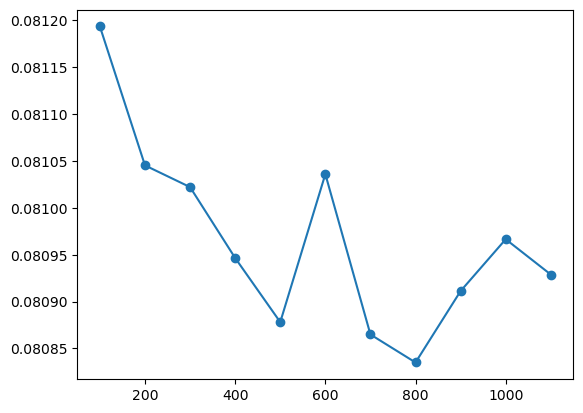

In [28]:
plt.plot(n_est, r2sc,marker="o")